In [79]:
!pip install japanize_matplotlib

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [81]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv')

In [82]:
train_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [84]:
train_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [85]:
train_df.shape

(193573, 11)

In [86]:
train_df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


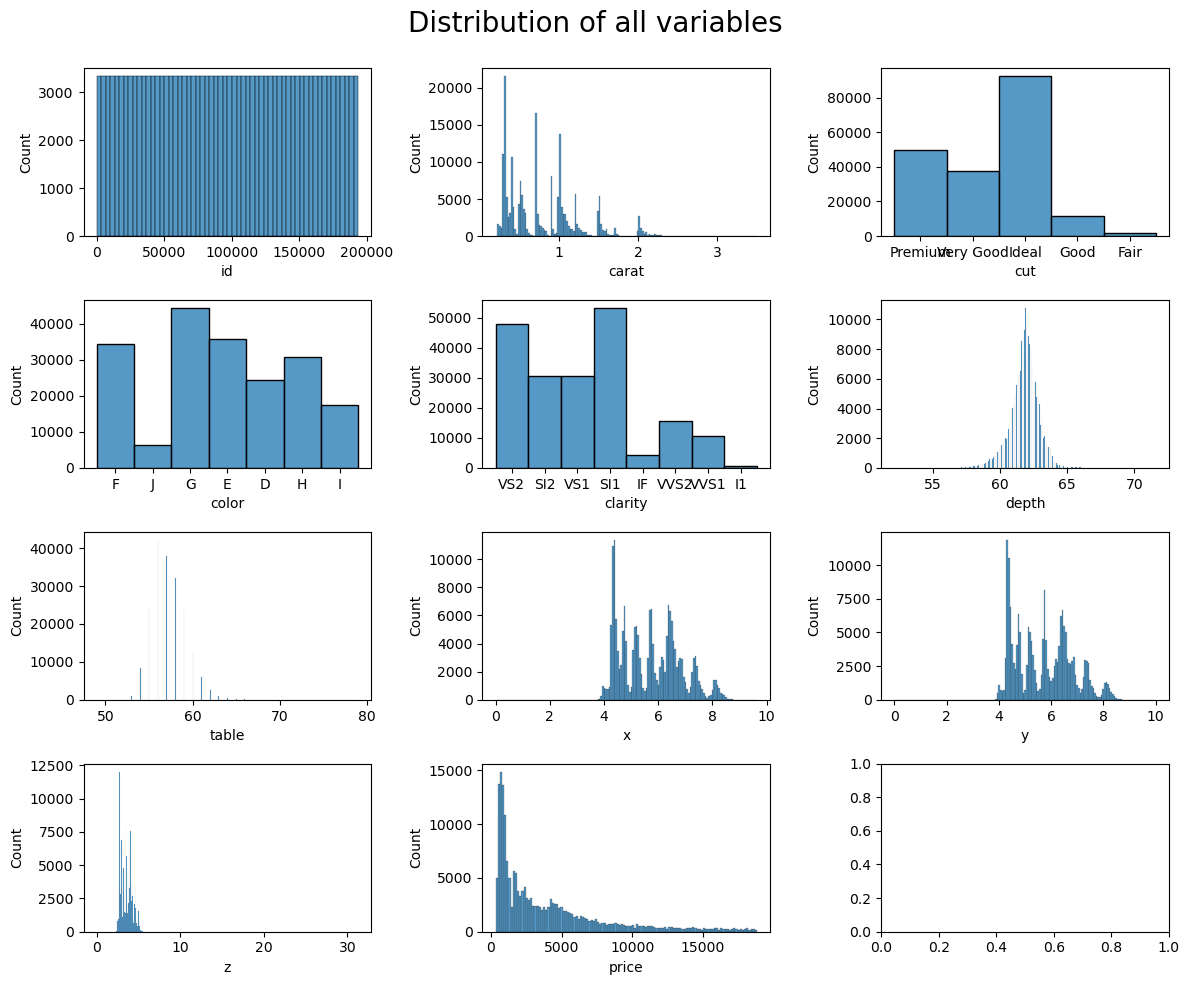

In [87]:
ncols = 3
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [88]:
TARGET = "price"

<AxesSubplot:xlabel='price', ylabel='Count'>

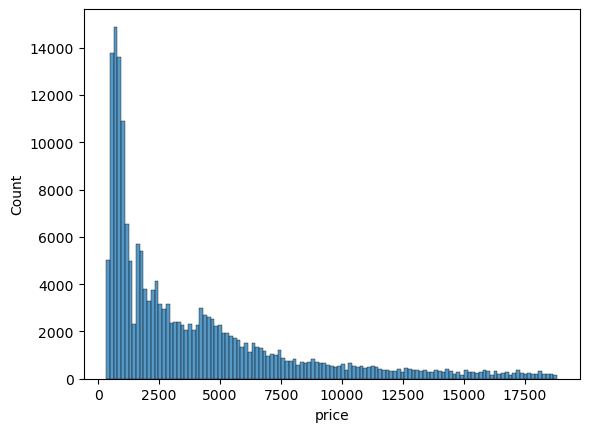

In [89]:
sns.histplot(train_df[TARGET])

In [90]:
train_df['log_price'] = np.log(train_df['price'])
train_df.drop('price',axis=1,inplace=True)
TARGET = "log_price"

<AxesSubplot:xlabel='log_price', ylabel='Count'>

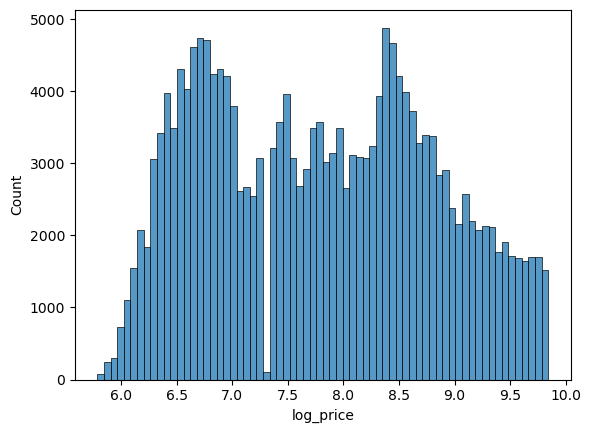

In [91]:
sns.histplot(train_df[TARGET])

In [92]:
X = train_df.iloc[:,1:-1]
y = train_df.iloc[:,-1]
test = test_df.iloc[:,1:]

In [98]:
from sklearn.preprocessing import LabelEncoder
l = len(X)
df = pd.concat([X,test_df])
cols = ['cut','color','clarity']
for col in cols:
    le = LabelEncoder()
    encoded = le.fit_transform(df[col].values)
    decoded = le.inverse_transform(encoded)
    df[col] = encoded
X = df[:l]
test = df[l:]

In [99]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [100]:
X_train, X_vald, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [101]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train,y_train)
y_pred_xgb = model_xgb.predict(X_vald)
print(mean_squared_error(y_pred_xgb,y_valid))

0.010990085381402765


In [102]:
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train,y_train)
y_pred_lgb = model_lgb.predict(X_vald)
print(mean_squared_error(y_pred_lgb,y_valid))

0.011009362966753027


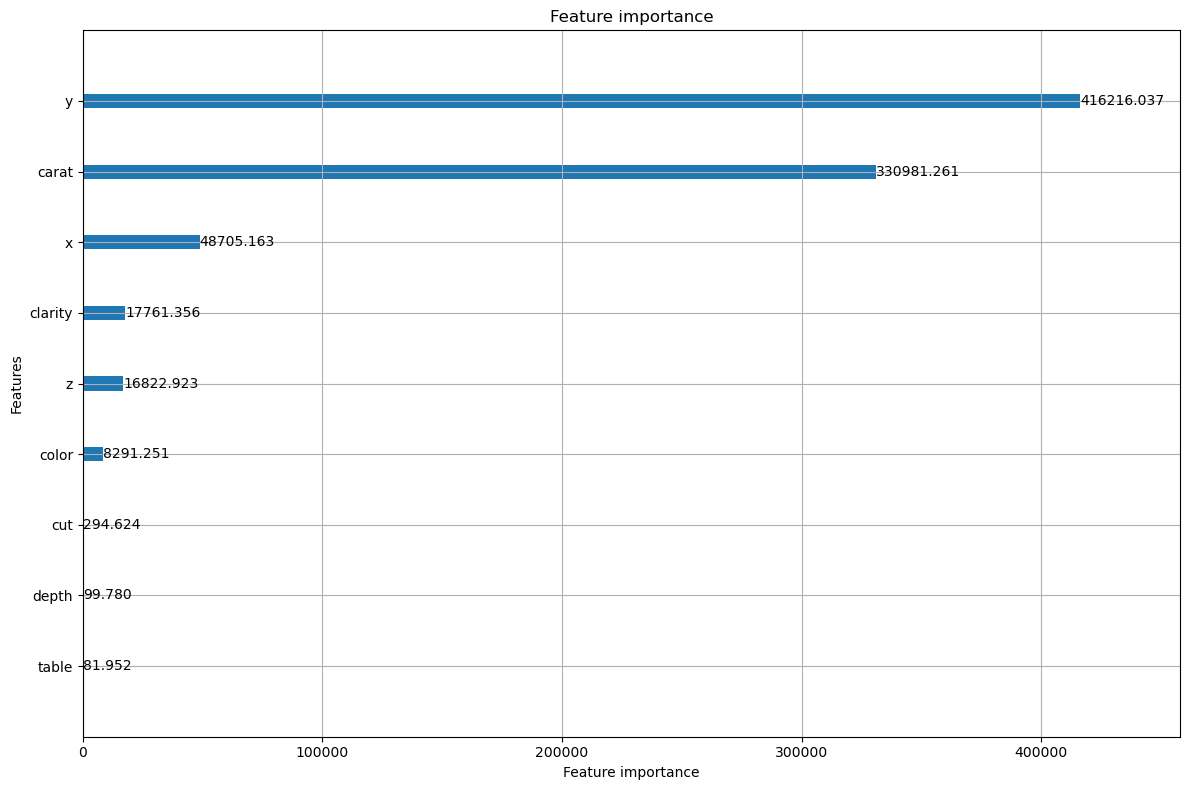

In [103]:
lgb.plot_importance(model_lgb, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

In [109]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e8/sample_submission.csv')
sub

,id,price
0,193573,3969.155
1,193574,3969.155
2,193575,3969.155
3,193576,3969.155
4,193577,3969.155
...,...,...
129045,322618,3969.155
129046,322619,3969.155
129047,322620,3969.155
129048,322621,3969.155


In [112]:
y_xgb = model_xgb.predict(test)
y_pred_xgb_true = np.exp(y_xgb)
sub['price'] = y_pred_xgb_true
sub.to_csv('/kaggle/working/xgb.csv',index=False)

In [113]:
y_lgb = model_lgb.predict(test)
y_pred_lgb_true = np.exp(y_lgb)
sub['price'] = y_pred_lgb_true
sub.to_csv('/kaggle/working/lgb.csv',index=False)

In [108]:
sub.isnull().sum()

id       0
price    0
dtype: int64